# <span style="color:green"> Laboratorio di Simulazione numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 6</span>

### Exercise 06.1: The Ising Model in una dimensione (IS-1D)

Un **Ensemble** statistico **Canonico** corrisponde alla descrizione di un sistema termodinamico i cui stati di equilibrio sono identificati dalla seguente collezione di variabili di stato **fissate**: 
1. **Volume V** del sistema (estensiva)
2. **Numero di particelle N** costituenti il sistema (estensiva)
3. **Temperatura T** del sistema (intensiva)

Esso si ottiene ponendo il sistema a contatto con un **serbatoio** (*heath bath*) che consente di mantenerne invariata la temperatura, mentre lascia libera la corrispondente variabile *estensiva*, l'**energia interna**, di fluttuare. La densità di probabilità più appropriata per descrivere un tale Ensemble, ossia la probabilità di trovare il sistema in uno specifico stato microscopico, è data dal cosiddetto **peso di Boltzmann** oppurtunamente normalizzato:

$$\rho(q,p) = \frac{e^{\frac{-H(q,p)}{K_bT}}}{Q_N(V,T)}$$

dove la normalizzazione $Q_N(V,T):=Z$, ossia il volume dello spazio delle fasi $\Gamma$ occupato da tale Ensemble, è detta **Funzione di Partizione**, $H(q,p):=E$ l'hamiltoniana del sistema, funzione delle coordinate e dei momenti dei gradi di libertà del sistema su cui è centrato l'elemento di volume infinitesimo che individua il microstato e $K_b$ la **costante di Boltzmann**.

La **media** di Ensemble di una osservabile $f=f(q,p)$ è data dunque dalla seguente espressione:

$$\langle f \rangle = \int\frac{d^{3N}q d^{3N}p}{h^{3N}N!}f(q,p)\frac{e^{\frac{-H(q,p)}{K_bT}}}{Q_N(V,T)}$$

Sfruttando l'algoritmo di **Metropolis**(o quello di **Gibbs**) risulta possibile campionare la distribuzione di probabilità multidimensionale associata all'ensemble canonico, senza preocuparsi della normalizzazione $Z$ (la maggior parte delle volte impossibile da determinare analiticamente) che si elide durante il calcolo della probabilità di accettazione, quindi, calcolare stocasticamente con metodi MC avanzati, nell'ambito della **meccanica statistica**, i valori medi con le relative incertezze statistiche delle osservabili di interesse nel sistema termodinamico considerato.

Il modello specifico che da qui in seguito viene preso in considerazione per la seguente esercitazione è il **modello di Ising**(IS) in una dimensione(**1D**), uno dei più famosi e più studiati nella meccanica statistica.
IS è il modello di un magnete dove i gradi di libertà sono i **momenti di dipolo magnetici**, associati agli **spin** atomici, posizionati su ogni sito di un reticolo dalla geometria arbitraria. Esso descrive il magnetissmo di un materiale di **bulk**.
Per ogni grado di libertà gli spin possono assumere **solo due valori**, $s_i=+1,-1$, i quali rappresentano i dipoli di grandezza unitaria che puntano, rispettivamente, verso l'alto o verso il basso.
Le due orientazioni dello spin per ogni sito garantiscono all'intero reticolo $2^N$ **configurazioni** possibili. 

Per un sistema di N spins l'Hamiltoniana che rappresenta l'energia di una singola configurazione è la seguente (con **magnetone di Bohr** $\mu_B=1$  e $k_B=1$):
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
dove $\{ s_i \}_{i=1,N}$ sono le variabili di spin, $J$ è l'energia di interazione che esprime la tendenza degli spin ad allinearsi, dovuta all'**interazione di scambio** presente tra gli spin reali, $h$ la costante di accoppiamento tra un campo magnetico esterno $B$ e gli spins del sistema.
Nella seguente trattazione $J$ viene assunta costante per ogni coppia di spin, diversa da zero solo per l'interazione dei cosiddetti spin primi vicini nel reticolo e inoltre maggiore di zero (modello del **ferromagnetismo**).

Se si fosse in grado di determinare la funzione di partizione Z del sistema termodinamico i risultati e il formalismo della meccanica statistica consentirebbero di calcolare innanzittuo l'**energia libera di Helmholtz** $A = -k_B T \ln Z$ e conseguentemente tutte le altre osservabili di interesse a partire dalle note relazioni termodinamiche che le legano.

Per il modello **IS-1D** tale via è percorribile e fornisce una risoluzione analitica del sistema. Qui di seguito vengono riportati i risultati di Z e delle osservabili di interesse per l'esercitazione:

1. **Funzione di partizione**
$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

   con $\beta = \frac{1}{K_bT}$
2. **Energia Interna per spin ($h=0$)**
$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$
3. **Capacità termica per spin ($h=0$)**
$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$
4. **Magnetizzazione per spin ($h \not= 0$)**
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$
5. **Suscettività magnetica per spin ($h=0$)**
$$
\chi(N,T) = \frac{\partial M}{\partial h} = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

L'**obiettivo** di questa esercitazione è quello di simulare l'**IS-1D** campionando il peso statistico di Boltzmann di ciascun grado di libertà $p(\{ s_i \}) = \exp(-\beta H)/Z$ con: 

1. L'algoritmo di **Metropolis**
2. L'algoritmo di **Gibbs**

per calcolare con metodi MC le seguenti osservabili termodinamiche:

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

funzioni della **temperaura** $T$ nell'intervallo $\left[0.5;2.0\right]$ per un sistema di $N=50$ spins con $J=1$ e confrontare i risultati ottenuti con gli esiti della derivazione analitica a disposizione.

Dato un sistema di Ising di dimensione finita N è possibile effettuarne una simulazione ad una qualsiasi temperatura fissata (Ensamble canonico) , dopo aver introdotto le **periodic boundary conditions (p.b.c.)** che garantiscono l'equivalenza di tutti i gradi di libertà del sistema circondati dallo stesso numero di primi vicini e dalla medesima geometria locale.

La simulazione numerica e il campionamento devono seguire alcuni passaggi:

1. Scegliere la **configurazione iniziale** di partenza degli spins, ovvero lo stato iniziale $\mu$ del sistema.

Tra le molteplici scelte, converrà selezionare quelle che aiutano a ridurre i successivi tempi di **equilibrazione**. Nel **codice c++** che implementa la simulazione si è stabilito di partire dalla configurazione $T=\infty$, ovvero dove gli spin sono orientati **up** o **down** casualmente in modo non correlato fra di loro e riempono un vettore di dimensione N, con l'accortezza che nei calcoli $s_{N+1} = s_1 $ per soddisfare le p.b.c. permettendo di simulare, con questa convenzione, un sistema con numero *infinito* di gradi di libertà.


2. Generare un nuovo stato $\nu$ scegliendo una **probabilità di transizione** $T(\mu|\nu)$. 

Questa scelta è **differente** in base all'algoritmo usato per campionare il peso di Boltzmann.

- **Algoritmo di Metropolis**: il nuovo stato sarà ottenuto *flippando* un singolo spin rispetto alla configurazione precedente e un **passo MC** della simulazione consisterà nel tentativo di girare tutti gli spin del sistema, uno per volta, estraendo casualmente l'indice $k$ associato al grado di libertà da flippare per un numero di volte pari ad $N$. Si noti che con questa scelta la probabilità di transizione risulta simmetrica. Modificando un'orientazione alla volta, l'unica differenza tra le configurazioni in termini di densità di probabilità $p(\mu)$ e $p(\nu)$ (peso di Boltzmann) è data dalla differenza di energia associata all'unico cambiamento tra i termini di interazione che coinvolge lo spin flippato. Scrivendo le formule per la **probabilità di accettazione** dell'algoritmo di metropolis :
$$
A(\mu|\nu) = min[1, \frac{p(\nu)}{p(\mu)}] = min[1,e^{-\beta(E_{\nu}-E_{\mu})}]
$$             con $E_{\nu}-E_{\mu} = -J\sum_{i n.n. to k}s_i^{\mu}(s_k^{\nu}-s_k^{\mu})$. Nota che la Z si semplifica. Ripetendo questo procedimento *ad libitum* si procederà scartando o accettando la nuova configurazione proposta se la variazione energetica ottenuta lo "favorisce" (probabilità di accettazione), quindi eseguendo il flip dello spin oppure lasciando la sua orientazione invariata. 



- **Algoritmo di Gibbs**: si ricordi che tale algoritmo può essere visto come un **caso particolare** del Metropolis nel quale la mossa proposta viene sempre accettata e sfruttando la probabilità condizionata si rivela utile ed efficiente quando quest'ultima risulta facile da campionare. Per quanto riguarda il modello di Ising è possibile simulare il sistema con l'algorimo di Gibbs partendo da una configurazione iniziale dei gradi di libertà (punto 1), estraendone uno **casualmente**, k, ad ogni time-step e sostituendo il valore dello spin visitato con un nuovo valore, indipendemente da quello attuale, preso dalla distribuzione condizionata degli altri spins primi vicini. Seguendo questo procedimento la probabilià che lo spin visitato casualmente assuma uno dei due valori possibili conoscendo le orientazioni degli spins primi vicini è data dalla seguente espressione:
$$
p(s_k^{new} = \pm 1|[s_j : j \not= k]) = \frac{1}{1+e^{-\beta\Delta E}}
$$  dove con $\Delta E$ si indica la differenza di energia per passare da un'orientazione all'altra degli spin. Essendo solo due i valori possibili, una volta calcolata la probabilità $p$ per una delle due transizioni ammesse, essendo la probabilità totale pari a 1, l'altra sarà data da $1-p$. Allora è sufficiente estrarre casualmente una variabile casuale tra $[0,1)$ e vedere in quale intervallo di probabilità cade, dopodichè accettare la mossa proposta sempre. Ogni step MC, come nel caso precedente, sarà composto da $N=50$ visite casuali dei gradi di libertà del sitema. 



3. **Equilibrazione del sistema** prima di effettuare l'effettiva simulazione del modello di Ising.

Partendo dalla cosiddetta configurazione $T=\infty$, per simulare il sistema ad un temperatura finita nell'intervallo richiesto è necessario spendere aluni step Monte Carlo per portare lo stesso alla condizione di equilibrio che viene raggiunta nel momento in cui la probabilità di trovare il sistema in un particolare stato $\mu$ sia proporzionale alla densità di probabilità associata a quella configurazione, ossia quando si sta campionando correttamente la $p(\mu)$.

In seguito saranno mostrati dei plots che illustrano l'andamento di alcune osservabili di interesse ad ogni step monte carlo nei primissimi istanti temporali della simulazione affinchè ci si possa accorgere *ad occhio* quando il sistema ha raggiunto l'equilibrio osservando che i **valori istantanei** delle grandezze termodinamiche si **stabilizzano** intorno ad un valore medio (accompagnati da fluttuazioni statistiche) con tempistiche dell'ordine di qualche centinaia di step MC.

4. Operazioni di misura tra cui le **stime dei valori dell'osservabile** di interesse con le relative **incertezze statistiche**

Una volta campionato correttamente il peso di Boltzmann relativo ad una specifica configurazione $\mu_i$, dopo il tempo di equilibrazione necessario, la stima dell'osservabile G è data da:
$$
\langle G \rangle = G_N = \frac{1}{N}\sum_{i=1}^N G(\mu_i)
$$
con N numero degli step MC.

Per essere sicuri di avere una buona stima delle quantità di interesse bisogna sapere quanto a lungo *mediare* e un buon indicatore di ciò è il **tempo di correlazione** $t_c$ della simulazione, ovvero il tempo che impiega il sistema per passare da uno stato ad un altro che sia significativamente diverso dal primo. In pratica, l'obiettivo è effettuare misure tanto a lungo da avere configurazioni e stime delle grandezze termodinamiche che siano **scorrelate** fra di loro e tali che le **funzioni di autocorrelazioni** ad esse associate tendano ad un valore nullo. Si ricordi infatti che l'algoritmo di Metropolis, costruendo e simulando un RW che rappresenta un processo di Markov, genera configurazioni a breve distanza temporale **altamente correlate** tra loro.

Dei campionamenti **statisticamente indipendenti** saranno ottenuti, secondo la regola convenzionale, ogni qualvolta saranno trascorsi due $t_c$ durante la simulazione. In questi intervalli temporali le funzioni di autocorrelazione tenderanno ad un valore nullo.

Per la simulazione del modello di Ising 1D, seppur senza determinare esplicitamente il tempo di correlazione, si è ritenuto sufficiente effettuare un numero $M = 200000$ di steps Monte Carlo per ottenere stime accurate delle grandezze di interesse.

Per quanto riguarda la determinazione delle stime degli  **errori statistici** viene sfruttata la tecnica del **data blocking**. L'algoritmo, producendo configurazioni correlate e non statisticamente indipendenti, non può sfruttare *direttamente* il **Teorema del Limite Centrale** perchè sono violate le ipotesi. Allora il metodo suggerisce di dividere la simulazione in **N blocchi**, sufficientemente lunghi, in modo da estarre da ciascuno separatamente le medie g_i e la diffusione dei valori medi su tutti i blocchi darà una stima dell'incertezza statistica. Il numero di steps MC per blocco deve essere tale da garantiree l'indipendenza statistica delle medie estratte dai blocchi. Essendo a questo punto i valori scorrelati è possibile applicare il T.L.C e trovare l'errore con la formula standard:
$$
\sigma_{\langle g \rangle} = \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N {g_i}^2 - \left( \frac{1}{N} \sum_{i=1}^N g_i \right)^2 \right]}
$$ 

Per il modello sotto esame la simulazione è stata divisa in 20 blocchi ciascuno di lunghezza $L = \frac{M}{N} = 10000$ steps MC.



####  Note sul codice c++ per l'equilibrazione e simulazione del modello IS-1D

Nella implementazione del codice c++ per la simulazione del modello di Ising monodimensionale sono stati scritti due file di input , **input.Metropolis** e **input.Gibbs** , che contengono tutti i parametri principali per effettuare la simulazione come la temperatura $T$, il numero di gradi di libertà del sistema $N$, l'energia di interazione $J$, la costante di accoppiamento $h$, il numero di blocchi e di steps per blocco. L'unico parametro che li differenzia è una variabile di tipo intero **metro** a cui è assegnato il valore 0 o 1 a seconda che si voglia simulare il modello con l'algoritmo di Gibbs o quello di Metropolis rispettivamente. Inoltre risulta necessario modificare per ogni simulazione la temperatura di equilibrio in modo da poter riportare i grafici con le stime delle grandezze termodinamiche, come l'energia interna, in funzione della temperatura nell'intervallo $\left[0.5;2.0\right]$. Il make file è dotato di comandi opportuni, *input_Gibbs* e *input_Metropolis*, per copiare tali file nel file *input.dat* che passa tutti i parametri al codice principale tramite la routine Input().

Il programma inizalmente stamperà a video una spiegazione delle sue modalità di funzionamento e una domanda a cui sarà necessario rispondere digitando la risposta 1 o 2 affinchè possa proseguire con una delle due modalità :

1. L'equilibrazione del sistema prima della simulazione reale del modello ( **answer==1**)

2. La simulazione effettiva del modello ( **answer==2** )

Per ogni configurazione di input ( variazioni di T e della variabile metro ) è necessario effettuare prima l'operazione numero 1 di equilibrazione e poi proseguire, riavviando il programma, con la simulazione del sistema di Ising. La prima modalità di funzionamento salva la configurazione finale degli spin ottenuta in un file, **config.final**, in modo che, tramite la routine InputRestart(), possa essere letta come configurazione di partenza nella seconda modalità di funzionamento prima di inizare la simulazione.

Inoltre nel makefile sono presenti anche dei comandi, *clean_Gibbs* e **clean_Metropolis**, che permettono a fine simulazione di rimuovere i file di output che contengono gli esiti dell'equilibrzione e della simulazione del sistema per le grandezze di interesse oltre che l'eseguibile.

#### Risultati della simulazione del modello IS-1D

##### 1) Equilibrazione 

Per ogni **set di pararmetri** di input, variando i valori di **temperatura** di con un incremento di $\Delta T = 0.1$ a partire dal valore $T_{in} = 0.5$ fino a $T_{fin} = 2.0$ e il valore della variabile **metro** che stabilisce quale dei due algoritmi usare per il campionamento della densità di probabilità, viene effettuata l'equilibrazione del sistema. 

Qui di seguito sono riportati gli esiti di questo processo iniziale, selezionando solo alcuni dei set di parametri ( su tutti quelli possibili), per mostrare che l'equilibrazione viene sempre raggiunta in poche centinaia di step MC a partire dalla configurazione iniziale dei gradi di libertà $T=\infty$ precedentemente motivata.


Per raggiungere tale scopo, nei plot vengono illustrati gli andamenti dei valori istantanei di **energia interna**, **magnetizzazione** e in funzione del tempo MC fino ad un valore 10000 steps.  

La scelta è ricaduta sull'estremo inferiore dell'intervallo di temperatura ($T_{in} = 0.5$) sia in presenza ($h=0.02$), che in assenza ($h=0$), di campo magnetico esterno perchè rappresenta la condizione più lontana dalla configurazione iniziale in cui si trova il sistema e richiederà un maggiore tempo di equilibrazione..

Gli esiti vengono salvati in appositi file *output.(grandezza).0(1)_(h)_equi* dove il label 0 o 1 indica l'uso dell'algoritmo di Gibbs o Metropolis rispettivamente.

**N.B.**: Ogni volta che si esegue una simulazione o un'equilibrazione è opportuno modificare i nomi dei file di output nel programma.

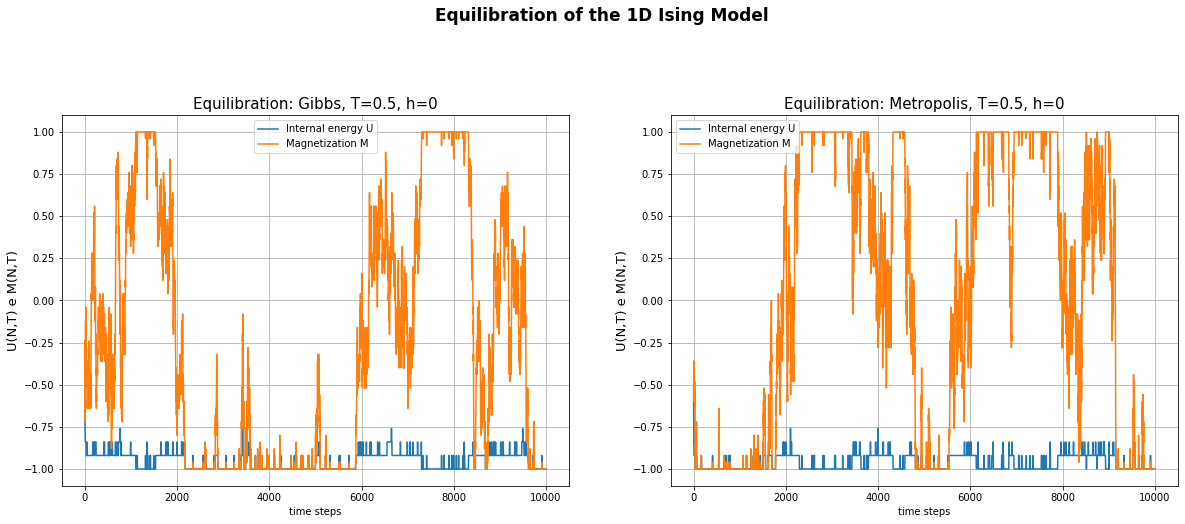

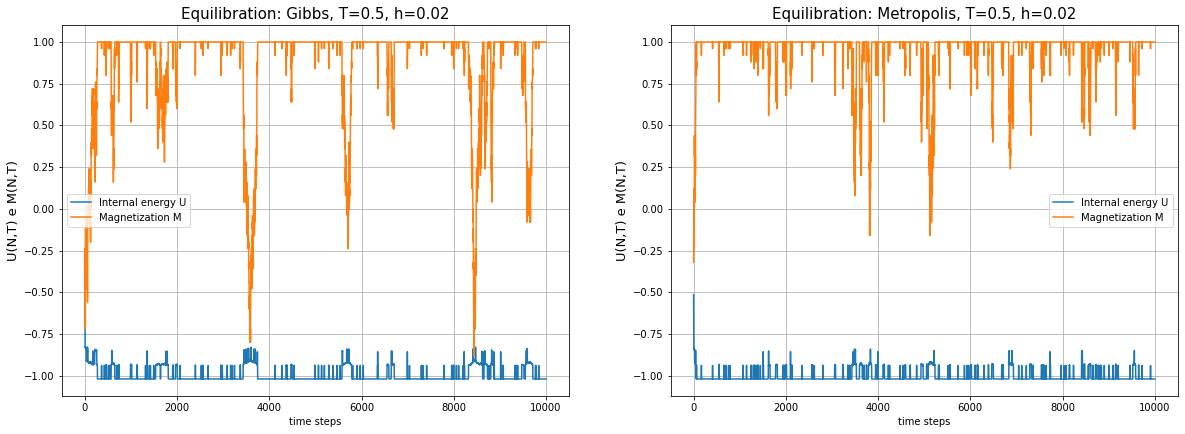

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#T=0.5 , h=0.00

#Gibbs
Steps, eint_equi_gibbs = np.loadtxt("Results/output.ene_0_equi", usecols=(0,1), unpack='true')
Steps, mag_equi_gibbs = np.loadtxt("Results/output.mag_0_equi", usecols=(0,1), unpack='true')
#Metropolis
Steps, eint_equi_metro = np.loadtxt("Results/output.ene_1_equi", usecols=(0,1), unpack='true')
Steps, mag_equi_metro = np.loadtxt("Results/output.mag_1_equi", usecols=(0,1), unpack='true')

Nspin = 50 # numero di spin del sistema

fig=plt.figure(figsize=(20,15))
plt.suptitle("Equilibration of the 1D Ising Model",fontsize='17',weight = 'bold')

#Gibbs algorithm, label 0
plt.subplot(221)
plt.plot(Steps,eint_equi_gibbs,label = "Internal energy U")
plt.plot(Steps,mag_equi_gibbs,label = "Magnetization M")
plt.title("Equilibration: Gibbs, T=0.5, h=0", size='15')
plt.xlabel('time steps')
plt.ylabel('U(N,T) e M(N,T)', size='13')
plt.grid(True)
plt.legend()

#Metropolis algorithm, label 1
plt.subplot(222)
plt.plot(Steps,eint_equi_metro,label = "Internal energy U")
plt.plot(Steps,mag_equi_metro,label = "Magnetization M")
plt.title("Equilibration: Metropolis, T=0.5, h=0", size='15')
plt.xlabel('time steps')
plt.ylabel('U(N,T) e M(N,T)', size='13')
plt.grid(True)
plt.legend()

#T=0.5 , h=0.02

#Gibbs
Steps, eint_equi_gibbs = np.loadtxt("Results/output.ene_0_h_equi", usecols=(0,1), unpack='true')
Steps, mag_equi_gibbs = np.loadtxt("Results/output.mag_0_h_equi", usecols=(0,1), unpack='true')
#Metropolis
Steps, eint_equi_metro = np.loadtxt("Results/output.ene_1_h_equi", usecols=(0,1), unpack='true')
Steps, mag_equi_metro = np.loadtxt("Results/output.mag_1_h_equi", usecols=(0,1), unpack='true')


fig=plt.figure(figsize=(20,15))

#Gibbs algorithm, label 0
plt.subplot(221)
plt.plot(Steps,eint_equi_gibbs,label = "Internal energy U")
plt.plot(Steps,mag_equi_gibbs,label = "Magnetization M")
plt.title("Equilibration: Gibbs, T=0.5, h=0.02", size='15')
plt.xlabel('time steps')
plt.ylabel('U(N,T) e M(N,T)', size='13')
plt.grid(True)
plt.legend()

#Metropolis algorithm, label 1
plt.subplot(222)
plt.plot(Steps,eint_equi_metro,label = "Internal energy U")
plt.plot(Steps,mag_equi_metro,label = "Magnetization M")
plt.title("Equilibration: Metropolis, T=0.5, h=0.02", size='15')
plt.xlabel('time steps')
plt.ylabel('U(N,T) e M(N,T)', size='13')
plt.grid(True)
plt.legend()


plt.show()





- Gli andamenti mostrano che il sistema raggiunge l'equilibrio in pochi centinaia di steps MC (300-400) dalla configurazione iniziale ($T=\infty$).


- Per quanto riguarda gli andamenti della magnetizzazione ci si accorge che non convergono ad un valore medio (in teoria $M=0$ per $h=0$) in assenza di campo esterno, ciò rende difficile prevedere visivamente il raggiungimento o meno della condizione di equilibrio. Se aggiungiamo il campo magnetico invece risulta tutto più evidente.

##### 2) Simulazione

Dopo aver equilibrato il sistema (con $N_{equisteps} = 10^4$) si esegue la simulazione del modello di Ising unidimensionale per ciascuno dei valori di temperatura fissati nell'intervallo $\left[0.5;2.0\right]$  a partire dall'estremo inferiore ($T=0.5$) fino a giungere a quello superiore ($T=2$) con variazioni costanti e successive pari a un decimo di $T$ ( $\Delta T= 0.1)$ campionando il peso statistico di boltzmann prima con l'algoritmo di Metropolis e poi con quello di Gibbs.

Ciascuna delle simulazioni viene suddivisa in 20 blocchi con 10000 steps Monte Carlo per ogni blocco. Gli esiti sono stati raccolti nei rispettivi files:

1. *output.(grandezza).0(1)_final* con i risultati delle stime in funzione della Temperatura.

Qui di seguito vengono riportati i grafici che mostrano gli andamenti delle stime delle 4 grandezze termodinamiche e delle differenze con la soluzione esatta del modello di Ising in funzione della temperatura T nell'intervallo considerato: energia interna $U(N,T,h=0)$, capacità termica $C(N,T,h=0)$, suscettibilità magnetica $\chi(N,T,h=0)$ e magnetizzazione $M(N,T,h=0.02)$. In ciascuno dei grafici vengono confrontati gli esiti della simulazione ottenuti con entrambi i campionamenti e con le **curve teoriche esatte** determinate a partire dalla soluzine analitica sopra richiamata. Nella seconda modalità le incertezze statistiche(le barre di errore) sono più evidenti e consentono di formulare, con più accuratezza, le conclusioni dell'analisi.

Si noti che la magnetizzazione viene calcolata in presenza di campo esterno ($h \not= 0$) poichè in assenza di quest'ultimo, in una dimensione, non si potrebbe verificare alcuna **transizione di fase ferromagnetica** e quindi il suo valore stimato sarebbe in media uguale a 0.


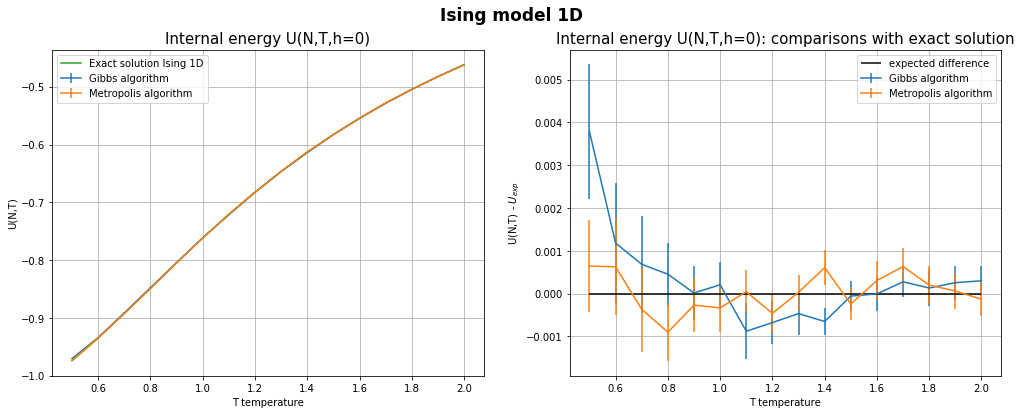

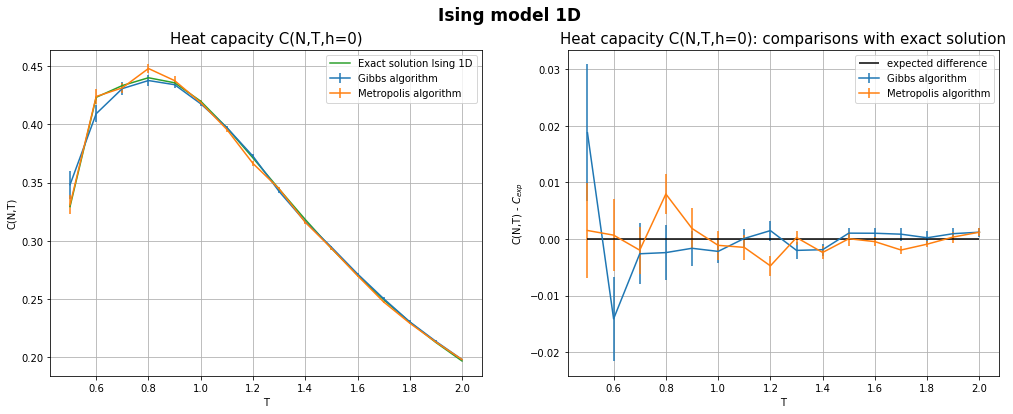

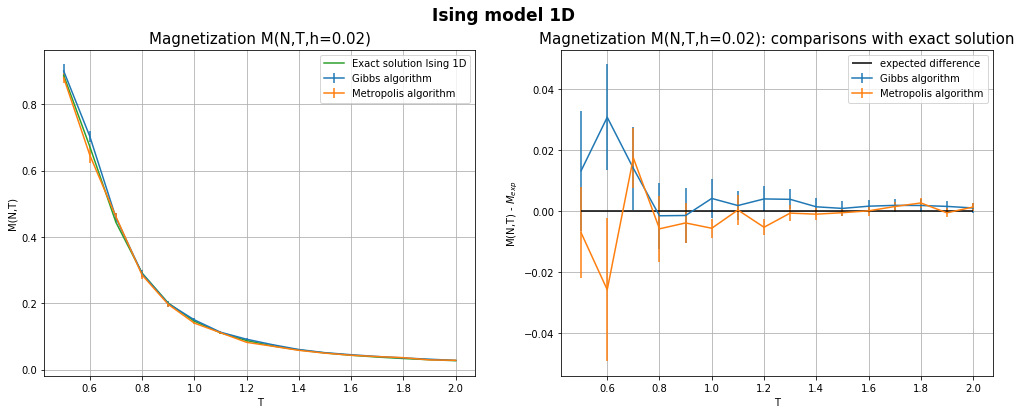

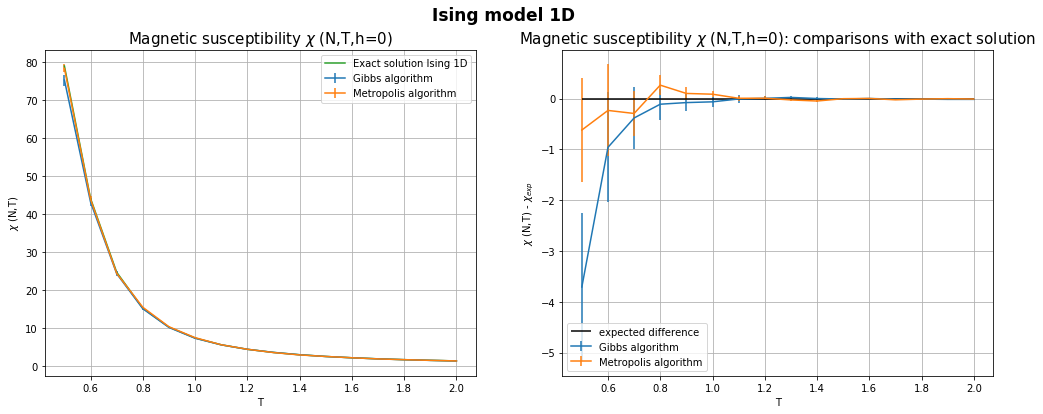

In [23]:
#Gibbs
Temp, eint_gibbs, error_eint_gibbs = np.loadtxt("Results/output.ene.0_final", usecols=(0,1,2), unpack='true')
Temp, heat_gibbs, error_heat_gibbs = np.loadtxt("Results/output.heat.0_final", usecols=(0,1,2), unpack='true')
Temp, mag_gibbs, error_mag_gibbs = np.loadtxt("Results/output.mag.0_final", usecols=(0,1,2), unpack='true')
Temp, chi_gibbs, error_chi_gibbs = np.loadtxt("Results/output.chi.0_final", usecols=(0,1,2), unpack='true')

#Metropolis
Temp, eint_metro, error_eint_metro = np.loadtxt("Results/output.ene.1_final", usecols=(0,1,2), unpack='true')
Temp, heat_metro, error_heat_metro = np.loadtxt("Results/output.heat.1_final", usecols=(0,1,2), unpack='true')
Temp, mag_metro, error_mag_metro = np.loadtxt("Results/output.mag.1_final", usecols=(0,1,2), unpack='true')
Temp, chi_metro, error_chi_metro = np.loadtxt("Results/output.chi.1_final", usecols=(0,1,2), unpack='true')




points=16
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

# U(N,T) analitica
e = -J*( th + ch*thN )/( 1 + thN )

fig1=plt.figure(figsize=(17,6))
plt.suptitle("Ising model 1D",fontsize='17',weight = 'bold')

plt.subplot(121)
plt.errorbar(Temp, eint_gibbs, yerr = error_eint_gibbs ,label = "Gibbs algorithm")
plt.errorbar(Temp, eint_metro, yerr = error_eint_metro,label = "Metropolis algorithm")
plt.plot(T, e, label = "Exact solution Ising 1D")
plt.title("Internal energy U(N,T,h=0)", size='15')
plt.xlabel('T temperature')
plt.ylabel('U(N,T)')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(Temp, eint_gibbs-e, yerr = error_eint_gibbs ,label = "Gibbs algorithm")
plt.errorbar(Temp, eint_metro-e, yerr = error_eint_metro,label = "Metropolis algorithm")
plt.title("Internal energy U(N,T,h=0): comparisons with exact solution", size='15')
plt.xlabel('T temperature')
plt.ylabel('U(N,T) - $U_{exp}$')
plt.hlines(0, 0.5, 2.0, label='expected difference')
plt.grid(True)
plt.legend()

# C(N,T) analitica
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)


fig2=plt.figure(figsize=(17,6))
plt.suptitle("Ising model 1D",fontsize='17',weight = 'bold')

plt.subplot(121)
plt.errorbar(Temp, heat_gibbs, yerr = error_heat_gibbs,label = "Gibbs algorithm")
plt.errorbar(Temp, heat_metro, yerr = error_heat_metro,label = "Metropolis algorithm")
plt.plot(T, heat, label = "Exact solution Ising 1D")
plt.title("Heat capacity C(N,T,h=0)",size='15')
plt.xlabel('T')
plt.ylabel('C(N,T)')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(Temp, heat_gibbs-heat, yerr = error_heat_gibbs,label = "Gibbs algorithm")
plt.errorbar(Temp, heat_metro-heat, yerr = error_heat_metro,label = "Metropolis algorithm")
plt.title("Heat capacity C(N,T,h=0): comparisons with exact solution", size='15')
plt.xlabel('T')
plt.ylabel('C(N,T) - $C_{exp}$')
plt.hlines(0, 0.5, 2.0, label='expected difference')
plt.grid(True)
plt.legend()

# M(N,T) analitica
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)



fig3=plt.figure(figsize=(17,6))
plt.suptitle("Ising model 1D",fontsize='17',weight = 'bold')

plt.subplot(121)
plt.errorbar(Temp, mag_gibbs, yerr = error_mag_gibbs,label = "Gibbs algorithm")
plt.errorbar(Temp, mag_metro, yerr = error_mag_metro,label = "Metropolis algorithm")
plt.plot(T, M, label = "Exact solution Ising 1D")
plt.title("Magnetization M(N,T,h=0.02)", size='15')
plt.xlabel('T')
plt.ylabel('M(N,T)')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(Temp, mag_gibbs-M, yerr = error_mag_gibbs,label = "Gibbs algorithm")
plt.errorbar(Temp, mag_metro-M, yerr = error_mag_metro,label = "Metropolis algorithm")
plt.title("Magnetization M(N,T,h=0.02): comparisons with exact solution", size='15')
plt.xlabel('T')
plt.ylabel('M(N,T) - $M_{exp}$')
plt.hlines(0, 0.5, 2.0, label='expected difference')
plt.grid(True)
plt.legend()


# $\chi$(N,T) analitica
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


fig4=plt.figure(figsize=(17,6))
plt.suptitle("Ising model 1D",fontsize='17',weight = 'bold')

plt.subplot(121)
plt.errorbar(Temp, chi_gibbs, yerr = error_chi_gibbs,label = "Gibbs algorithm")
plt.errorbar(Temp, chi_metro, yerr = error_chi_metro,label = "Metropolis algorithm")
plt.plot(T, X, label = "Exact solution Ising 1D")
plt.title("Magnetic susceptibility $\chi$ (N,T,h=0)",size='15')
plt.xlabel('T')
plt.ylabel('$\chi$ (N,T)')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(Temp, chi_gibbs-X, yerr = error_chi_gibbs,label = "Gibbs algorithm")
plt.errorbar(Temp, chi_metro-X, yerr = error_chi_metro,label = "Metropolis algorithm")
plt.title("Magnetic susceptibility $\chi$ (N,T,h=0): comparisons with exact solution", size='15')
plt.xlabel('T')
plt.ylabel('$\chi$ (N,T) - $\chi_{exp}$')
plt.hlines(0, 0.5, 2.0, label='expected difference')
plt.grid(True)
plt.legend()
plt.show()


- Dai plots si evince una marcata **compatibilità** tra le curve teoriche e le simulazioni effettuate campionando la densità di probabiltà con entrambi gli algoritmi. Si osservano dei **maggiori discostamenti** dai valori attesi e con errori più consistenti a **temperature basse**, inferiori a 1, particolarmente evidenti nel grafico della capacità termica. 

- L'ultima osservazione è riconducibile al fatto che a temperature molto basse la configurazione degli spins tende a realizzare lo stato di Ground State ($T=0$) che, nel caso di campo esterno nullo, ammette una doppia degenerazione (tutti gli spin orientati up o tutti down). In tale stato, che corrisponde appunto al GS del modello di Ising, il sistema non soddisfa più l'ipotesi di **ergodicità**, la regione dello spazio delle fasi esplorabile dal Metropolis (perchè gli spins non sono più liberi di flipparsi) si riduce e l'algoritmo perde efficienza. Si può infatti notare, dalle simulazioni, che il tasso di accettazione diminuisce al diminuire della temperatura, le configurazioni accettate si riducono sempre di più a basse temperature. Ossia al diminuire della temperatura le configurazioni campionate si discostano con minor frequenza dal GS e per ottenere valori medi più accurati sarebbe necessario un tempo di simulazione più lungo.